<a href="https://colab.research.google.com/github/tuomaseerola/audio/blob/master/librosa_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Music and Science – Seminar 2: Acoustic analysis

[Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), Durham University, Music Department, 2021.

Audio examples adapted from the [FMP Notebooks](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html) by Meinhard Müller, which are part of [Fundamentals of Music Processing](https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP).

### How to use Colab
- Code blocks can be run within a browser.
- You can edit the code and try out what happens (change parameters etc.)


In [1]:
#PROMPT: Press the play button to set up the technical system (import libraries etc.)
import numpy as np
#import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt 
%matplotlib inline
print(librosa.__version__)

0.8.1


## 1. Create sine waves

### 1.1. Define the properties of a sine wave

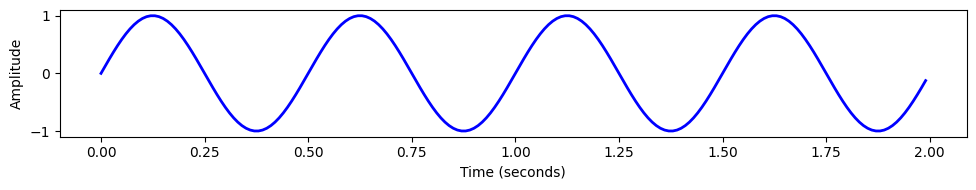

In [2]:
frequency = 2   # Frequency   #PROMPT: Change the values of the frequency, duration, amplitude, phase, and sampling rate to see how the output changes.
duration = 2    # Duration of sound
amplitude = 1.0 # Amplitude
phase = 0.0     # Phase
Fs = 100        # Sampling rate (per second)

# This code creates the sine wave with the properties you detailed above
num_samples = int(Fs * duration) 
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

# This code plots the result
plt.figure(figsize=(10, 2))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

### 1.2 Create a sine wave that you can listen to 
Try varying the parameters (frequency, phase, amplitude).

**TASK:** Can you make a sine wave double the original frequency?

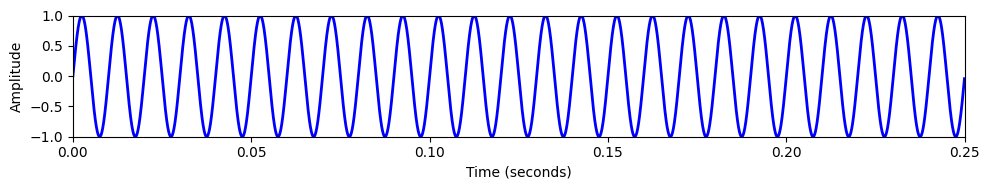

In [3]:
frequency = 100  #PROMPT: Change the values of the frequency and phase and run the code. Notice the differences in the audio file and plot.
duration = 0.25
amplitude = 1.0
phase = 0.0
Fs = 22050

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

plt.figure(figsize=(10, 2))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, duration])
plt.ylim([-1, 1])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
ipd.display(ipd.Audio(data=x, rate=Fs))

### 1.3 Combine several sine waves to create a complex sound
**TASK** - try altering the frequencies:
  * Try to create a sound that has a missing fundamental frequency of 100Hz (lecture example had 800, 1000, and 1200 hz).
  * Try to create a "beating" effect by having frequencies that are within 30 Hz. In which frequency and what differences creates the strongest sensation of beating? 

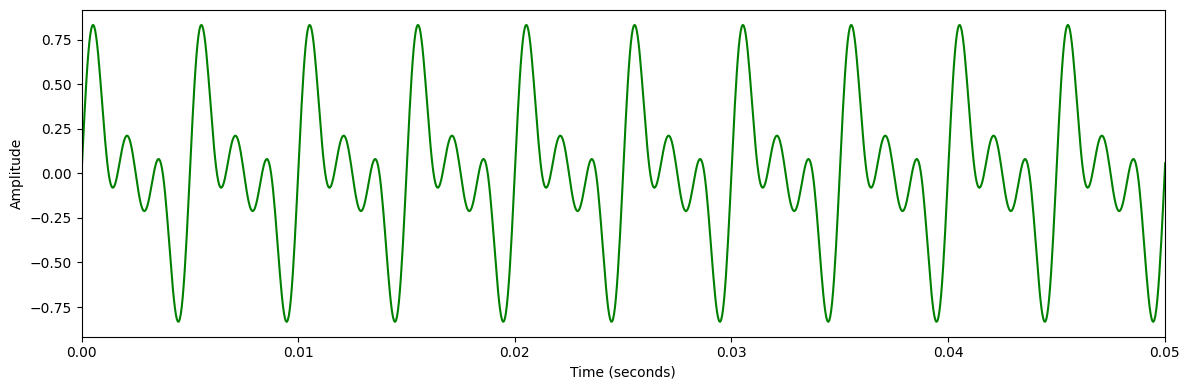

In [4]:
# Combine several sine waves (here are three frequencies)
frequency1 = 200 #PROMPT: Change the values of the 3 frequencies and listen to the output. Carry out the tasks above. 
frequency2 = 400
frequency3 = 600
duration = 1.0
amplitude = 1.0
phase = 0.0
Fs = 22050

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x1 = amplitude * np.sin(2 * np.pi * (frequency1 * t - phase)) # 1st sine
x2 = amplitude * np.sin(2 * np.pi * (frequency2 * t - phase)) # 2nd sine
x3 = amplitude * np.sin(2 * np.pi * (frequency3 * t - phase)) # 3rd sine
# Combine all three (sum and divide by 3 to keep the amplitude as original)
x123=(x1+x2+x3)/3

plt.figure(figsize=(12, 4))
plt.plot(t, x123, color='green')
plt.xlim([0, 0.05])             # New element: Just show the first 50 ms
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
ipd.display(ipd.Audio(data=x123, rate=Fs))